In [22]:
import os
import sys
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
np.set_printoptions(suppress=True)
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import norm
pd.options.display.float_format = '{:.3g}'.format
sns.set(font_scale = 1.0, rc={"grid.linewidth": 1,'grid.color': '#b0b0b0', 'axes.edgecolor': 'black',"lines.linewidth": 3.0}, style = 'whitegrid')
from datetime import datetime
sys.path.append('../src')
from shockElasDecomposition import computeElas
now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)
sns.set(style="whitegrid", font_scale=1.13, rc={"lines.linewidth": 3.5})

Current Time = 22:12:34


In [23]:
Delta = 10.0
delta = 0.01
gamma = 8.0
rho = 1.0
dataname = "upper_triangular_four_ambiguous_parameters"
zscale = 2.0
zmax = 5.0

q = 0.1
distorted = 0

logadjustment = 1
boundary = 0
filename = "model.npz"
# elaname = "model_dis_ela_Z"
filename_ell = "../output/"+dataname+"/Delta_"+str(Delta)+"_distorted_"+str(distorted)+"/logadjustment_"+str(logadjustment)+"_boundary_"+str(boundary)+"/zmax_"+str(zmax)+"_zscale_"+str(zscale)+"/delta_"+str(delta)+"/q_"+str(q)+"_gamma_"+str(gamma)+"_rho_"+str(rho)+"/"
npz = np.load(filename_ell + filename)
ela = np.load(filename_ell + elaname,allow_pickle=True)
g_Z = npz['g']

def find_closest_idx(sorted_list, target):
        closest_idx = None
        closest_val = None
        for idx, val in enumerate(sorted_list):
            if closest_val is None or abs(target - val) < abs(target - closest_val):
                closest_val = val
                closest_idx = idx
        return closest_idx

zgrid = int(200*zscale+1)
zscale = 2*zmax/(zgrid-1)
cdf_Z = np.cumsum(g_Z)*zscale
Z_percentile_10 = find_closest_idx(cdf_Z.tolist(), 0.1)
Z_percentile_50 = find_closest_idx(cdf_Z.tolist(), 0.5)
Z_percentile_90 = find_closest_idx(cdf_Z.tolist(), 0.9)

# npz['d'][0] - npz['d'][0]**2/2*28 - np.sum(npz['sigma_k']**2)/2 - 0.01279

In [47]:
def return_fdm_solution(gamma = 1.0, delta = 0.01, Delta = 10.0, q = 0.05, rho = 1.0, dataname = "upper_triangular_four_ambiguous_parameters"):
    
    # dataname = "upper_triangular_four_ambiguous_parameters"
    # dataname = "upper_triangular_two_ambiguous_parameters"
    # dataname = "lower_triangular_four_ambiguous_parameters"
    # dataname = "lower_triangular_two_ambiguous_parameters"

    zscale = 2.0
    zmax = 5.0
    distorted = 0
    logadjustment = 1
    boundary = 1

    filename = "model.npz"
    ela_org_name = "model_org_ela_Z"
    ela_dis_name = "model_dis_ela_Z"
    sol_org_name = "model_org_sol_Z"
    sol_dis_name = "model_dis_sol_Z"
    filename_ell = "../output/"+dataname+"/Delta_"+str(Delta)+"_distorted_"+str(distorted)+"/logadjustment_"+str(logadjustment)+"_boundary_"+str(boundary)+"/zmax_"+str(zmax)+"_zscale_"+str(zscale)+"/delta_"+str(delta)+"/q_"+str(q)+"_gamma_"+str(gamma)+"_rho_"+str(rho)+"/"
    npz = np.load(filename_ell + filename)
    # ela_org = np.load(filename_ell + ela_org_name,allow_pickle=True)
    ela_dis = np.load(filename_ell + ela_dis_name,allow_pickle=True)
    # sol_org = np.load(filename_ell + sol_org_name,allow_pickle=True)
    sol_dis = np.load(filename_ell + sol_dis_name,allow_pickle=True)
    
    zgrid = int(200*zscale+1)
    zscale = 2*zmax/(zgrid-1)

    g_Z = npz['g']

    def find_closest_idx(sorted_list, target):
        closest_idx = None
        closest_val = None
        for idx, val in enumerate(sorted_list):
            if closest_val is None or abs(target - val) < abs(target - closest_val):
                closest_val = val
                closest_idx = idx
        return closest_idx

    cdf_Z = np.cumsum(g_Z)*zscale
    Z_percentile_10 = find_closest_idx(cdf_Z.tolist(), 0.1)
    Z_percentile_50 = find_closest_idx(cdf_Z.tolist(), 0.5)
    Z_percentile_90 = find_closest_idx(cdf_Z.tolist(), 0.9)

    mu_z = npz['mu_z']
    mu_z_s = npz['mu_z_distorted']
    hk = npz['hk']
    hz = npz['hz']
    Hk = (1-gamma)*hk
    Hz = (1-gamma)*hz
    sk = npz['s1']
    sz = npz['s2']
    mu_z_u = (1-gamma) * (hk*npz['sigma_z'][0] + hz*npz['sigma_z'][1])
    mu_z_d = mu_z + mu_z_s + mu_z_u
    Uk = sk + Hk
    Uz = sz + Hz

    results = {'mu_z':mu_z,'mu_z_u':mu_z_u,'mu_z_s':mu_z_s,'mu_z_d':mu_z_d,\
               'g_Z':g_Z,'Hk':Hk,'Hz':Hz,'npz':npz,'cdf_Z':cdf_Z,\
                'Z_percentile_10':Z_percentile_10,'Z_percentile_50':Z_percentile_50,'Z_percentile_90':Z_percentile_90,\
                'Uk':Uk,'Uz':Uz,'sk':sk,'sz':sz,'ela_dis':ela_dis,'sol_dis':sol_dis}

    return results

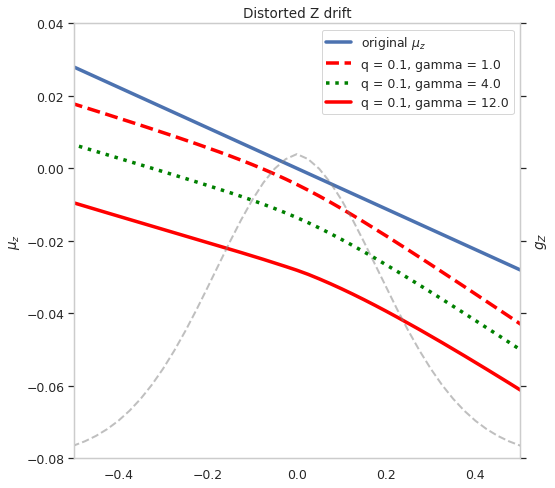

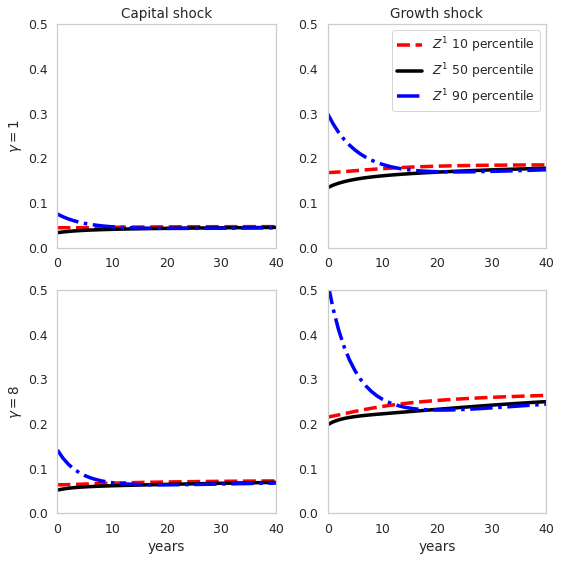

In [66]:
dataname = "upper_triangular_four_ambiguous_parameters"
# dataname = "upper_triangular_two_ambiguous_parameters"
# dataname = "lower_triangular_four_ambiguous_parameters"
# dataname = "lower_triangular_two_ambiguous_parameters"
gamma_1_q_05_rho_1 = return_fdm_solution(gamma = 1.0, q = 0.05, dataname=dataname)
gamma_1_q_10_rho_1 = return_fdm_solution(gamma = 1.0, q = 0.1, dataname=dataname)
gamma_1_q_20_rho_1 = return_fdm_solution(gamma = 1.0, q = 0.2, dataname=dataname)
gamma_1_q_30_rho_1 = return_fdm_solution(gamma = 1.0, q = 0.3, dataname=dataname)

gamma_4_q_05_rho_1 = return_fdm_solution(gamma = 4.0, q = 0.05, dataname=dataname)
gamma_4_q_10_rho_1 = return_fdm_solution(gamma = 4.0, q = 0.1, dataname=dataname)
gamma_4_q_20_rho_1 = return_fdm_solution(gamma = 4.0, q = 0.2, dataname=dataname)
gamma_4_q_30_rho_1 = return_fdm_solution(gamma = 4.0, q = 0.3, dataname=dataname)

gamma_5_q_05_rho_1 = return_fdm_solution(gamma = 5.0, q = 0.05, dataname=dataname)
gamma_5_q_10_rho_1 = return_fdm_solution(gamma = 5.0, q = 0.1, dataname=dataname)
gamma_5_q_20_rho_1 = return_fdm_solution(gamma = 5.0, q = 0.2, dataname=dataname)
gamma_5_q_30_rho_1 = return_fdm_solution(gamma = 5.0, q = 0.3, dataname=dataname)

gamma_6_q_05_rho_1 = return_fdm_solution(gamma = 6.0, q = 0.05, dataname=dataname)
gamma_6_q_10_rho_1 = return_fdm_solution(gamma = 6.0, q = 0.1, dataname=dataname)
gamma_6_q_20_rho_1 = return_fdm_solution(gamma = 6.0, q = 0.2, dataname=dataname)
gamma_6_q_30_rho_1 = return_fdm_solution(gamma = 6.0, q = 0.3, dataname=dataname)

gamma_7_q_05_rho_1 = return_fdm_solution(gamma = 7.0, q = 0.05, dataname=dataname)
gamma_7_q_10_rho_1 = return_fdm_solution(gamma = 7.0, q = 0.1, dataname=dataname)
gamma_7_q_20_rho_1 = return_fdm_solution(gamma = 7.0, q = 0.2, dataname=dataname)
gamma_7_q_30_rho_1 = return_fdm_solution(gamma = 7.0, q = 0.3, dataname=dataname)

gamma_8_q_05_rho_1 = return_fdm_solution(gamma = 8.0, q = 0.05, dataname=dataname)
gamma_8_q_10_rho_1 = return_fdm_solution(gamma = 8.0, q = 0.1, dataname=dataname)
gamma_8_q_20_rho_1 = return_fdm_solution(gamma = 8.0, q = 0.2, dataname=dataname)
gamma_8_q_30_rho_1 = return_fdm_solution(gamma = 8.0, q = 0.3, dataname=dataname)

gamma_12_q_05_rho_1 = return_fdm_solution(gamma = 12.0, q = 0.05, dataname=dataname)
gamma_12_q_10_rho_1 = return_fdm_solution(gamma = 12.0, q = 0.1, dataname=dataname)
gamma_12_q_20_rho_1 = return_fdm_solution(gamma = 12.0, q = 0.2, dataname=dataname)
gamma_12_q_30_rho_1 = return_fdm_solution(gamma = 12.0, q = 0.3, dataname=dataname)

gammas = [8.0, 12.0, 8.0, 12.0]
qs = [0.05, 0.05, 0.1, 0.1]

gammas = [8.0, 8.0, 4.0, 4.0]
gammas = [8.0, 8.0, 6.0, 6.0]
gammas = [8.0, 8.0, 12.0, 12.0]
qs = [0.05, 0.1, 0.05, 0.1]
qs = [0.1, 0.05, 0.1, 0.05]
qs = [0.2, 0.3, 0.2, 0.3]

fig, ax = plt.subplots(figsize=(8, 8))
original_z = pd.DataFrame(-npz['zz']*npz['a11'],index = npz['zz'],columns = ['original'])
sns.lineplot(data=original_z, x=original_z.index, y='original', ax=ax, label=r"original $\mu_z$")

# sns.lineplot(x = npz['zz'], y = gamma_1_q_10_rho_1['mu_z_d'], label = 'q = 0.1, gamma = 1.0', ls='--',color='orange')
sns.lineplot(x = npz['zz'], y = gamma_1_q_10_rho_1['mu_z_d'], label = 'q = 0.1, gamma = 1.0', ls='--',color='red')
sns.lineplot(x = npz['zz'], y = gamma_4_q_10_rho_1['mu_z_d'], label = 'q = 0.1, gamma = 4.0',ls=':',color='green')
sns.lineplot(x = npz['zz'], y = gamma_8_q_10_rho_1['mu_z_d'], label = 'q = 0.1, gamma = 12.0',color='red')
ax.set_ylim([-0.08, 0.04])
ax.grid(False)
ax.set_ylabel(r'$\mu_z$')
ax2 = ax.twinx()
sns.lineplot(x = npz['zz'],y=gamma_1_q_05_rho_1['g_Z'], label=r"$g_Z$", ax=ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.set_ylabel(r'$g_Z$')
ax2.set_yticklabels([])
ax2.set_ylim([0,3.0])
ax2.get_legend().remove()
ax2.grid(False)
ax.set_xlim([-0.5,0.5])
plt.title('Distorted Z drift')
plt.show()

def plot_data(ax, data, gamma, q, shock):
    sns.lineplot(data=-data['ela_dis']['NexpoElas'].secondType[0,shock,:], label=r"$Z^1$ 10 percentile", ax=ax, ls = '--', color = 'red')
    sns.lineplot(data=-data['ela_dis']['NexpoElas'].secondType[1,shock,:], label=r"$Z^1$ 50 percentile", ax=ax, ls = '-', color = 'black')
    sns.lineplot(data=-data['ela_dis']['NexpoElas'].secondType[2,shock,:], label=r"$Z^1$ 90 percentile", ax=ax, ls = '-.',  color = 'blue')
    ax.set_ylim([0.0, 2.1])
    ax.set_xlim([0.0, 40.0])
    #ax.set_ylabel(r'Price elasticity')
    #ax.set_xlabel(r'$Years$')
    if i == 0 and j==0:
        ax.set_title(r'Capital shock')
        ax.set_ylabel(r'$\gamma=1$')
    elif i == 1 and j==0:
        ax.set_title(r'Growth shock')
    if i == 0 and j==1:
        ax.set_ylabel(r'$\gamma=8$')
    if i != 1 or j!=0:
        ax.get_legend().remove()
    if j==1:
        ax.set_xlabel('years')
    ax.grid(False)
    # fig.suptitle('Uncertainty Shock Elasticities', fontsize=16)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
# datasets = [gamma_1_q_05_rho_1, gamma_8_q_05_rho_1, gamma_1_q_10_rho_1, gamma_8_q_10_rho_1]
# datasets = [gamma_1_q_10_rho_1, gamma_8_q_10_rho_1, gamma_1_q_30_rho_1, gamma_8_q_30_rho_1]
# datasets = [gamma_1_q_10_rho_1, gamma_8_q_10_rho_1, gamma_1_q_20_rho_1, gamma_8_q_20_rho_1]
# datasets = [gamma_1_q_30_rho_1, gamma_8_q_30_rho_1, gamma_1_q_40_rho_1, gamma_8_q_40_rho_1]
datasets = [gamma_1_q_20_rho_1, gamma_1_q_30_rho_1, gamma_8_q_20_rho_1, gamma_8_q_30_rho_1]
shocks = [0, 1]
gammas = [2.0, 4.0]
qs = [0.3, 0.3]
for i, shock in enumerate(shocks):
    for j, (data, gamma, q) in enumerate(zip(datasets, gammas, qs)):
        plot_data(axes[j, i], data, gamma, q, shock)

axes[0,0].set_ylim(0,0.5)

axes[1,0].set_ylim(0,0.5)

axes[1,1].set_ylim(0,0.5)

axes[0,1].set_ylim(0,0.5)
fig.tight_layout()
# plt.savefig('/project/lhansen/onecapqua/plot/updated_plots/nexpo.png', dpi=300, bbox_inches='tight')

plt.show()

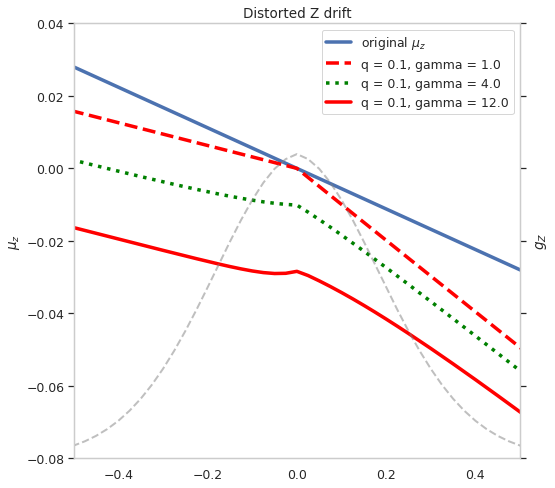

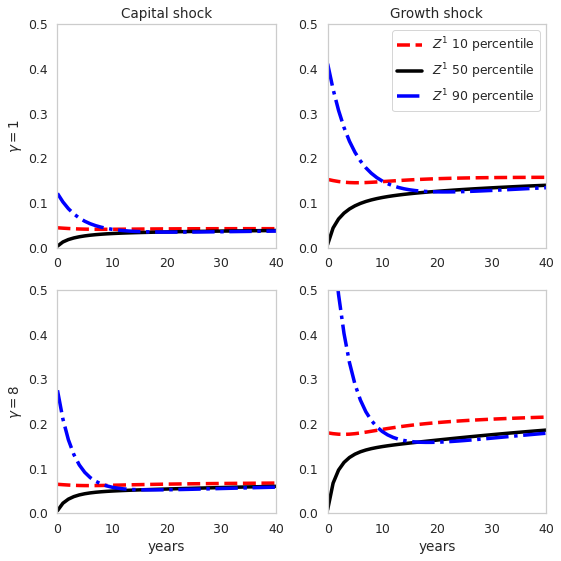

In [67]:
# dataname = "upper_triangular_four_ambiguous_parameters"
dataname = "upper_triangular_two_ambiguous_parameters"
# dataname = "lower_triangular_four_ambiguous_parameters"
# dataname = "lower_triangular_two_ambiguous_parameters"
gamma_1_q_05_rho_1 = return_fdm_solution(gamma = 1.0, q = 0.05, dataname=dataname)
gamma_1_q_10_rho_1 = return_fdm_solution(gamma = 1.0, q = 0.1, dataname=dataname)
gamma_1_q_20_rho_1 = return_fdm_solution(gamma = 1.0, q = 0.2, dataname=dataname)
gamma_1_q_30_rho_1 = return_fdm_solution(gamma = 1.0, q = 0.3, dataname=dataname)

gamma_4_q_05_rho_1 = return_fdm_solution(gamma = 4.0, q = 0.05, dataname=dataname)
gamma_4_q_10_rho_1 = return_fdm_solution(gamma = 4.0, q = 0.1, dataname=dataname)
gamma_4_q_20_rho_1 = return_fdm_solution(gamma = 4.0, q = 0.2, dataname=dataname)
gamma_4_q_30_rho_1 = return_fdm_solution(gamma = 4.0, q = 0.3, dataname=dataname)

gamma_5_q_05_rho_1 = return_fdm_solution(gamma = 5.0, q = 0.05, dataname=dataname)
gamma_5_q_10_rho_1 = return_fdm_solution(gamma = 5.0, q = 0.1, dataname=dataname)
gamma_5_q_20_rho_1 = return_fdm_solution(gamma = 5.0, q = 0.2, dataname=dataname)
gamma_5_q_30_rho_1 = return_fdm_solution(gamma = 5.0, q = 0.3, dataname=dataname)

gamma_6_q_05_rho_1 = return_fdm_solution(gamma = 6.0, q = 0.05, dataname=dataname)
gamma_6_q_10_rho_1 = return_fdm_solution(gamma = 6.0, q = 0.1, dataname=dataname)
gamma_6_q_20_rho_1 = return_fdm_solution(gamma = 6.0, q = 0.2, dataname=dataname)
gamma_6_q_30_rho_1 = return_fdm_solution(gamma = 6.0, q = 0.3, dataname=dataname)

gamma_7_q_05_rho_1 = return_fdm_solution(gamma = 7.0, q = 0.05, dataname=dataname)
gamma_7_q_10_rho_1 = return_fdm_solution(gamma = 7.0, q = 0.1, dataname=dataname)
gamma_7_q_20_rho_1 = return_fdm_solution(gamma = 7.0, q = 0.2, dataname=dataname)
gamma_7_q_30_rho_1 = return_fdm_solution(gamma = 7.0, q = 0.3, dataname=dataname)

gamma_8_q_05_rho_1 = return_fdm_solution(gamma = 8.0, q = 0.05, dataname=dataname)
gamma_8_q_10_rho_1 = return_fdm_solution(gamma = 8.0, q = 0.1, dataname=dataname)
gamma_8_q_20_rho_1 = return_fdm_solution(gamma = 8.0, q = 0.2, dataname=dataname)
gamma_8_q_30_rho_1 = return_fdm_solution(gamma = 8.0, q = 0.3, dataname=dataname)

gamma_12_q_05_rho_1 = return_fdm_solution(gamma = 12.0, q = 0.05, dataname=dataname)
gamma_12_q_10_rho_1 = return_fdm_solution(gamma = 12.0, q = 0.1, dataname=dataname)
gamma_12_q_20_rho_1 = return_fdm_solution(gamma = 12.0, q = 0.2, dataname=dataname)
gamma_12_q_30_rho_1 = return_fdm_solution(gamma = 12.0, q = 0.3, dataname=dataname)

gammas = [8.0, 12.0, 8.0, 12.0]
qs = [0.05, 0.05, 0.1, 0.1]

gammas = [8.0, 8.0, 4.0, 4.0]
gammas = [8.0, 8.0, 6.0, 6.0]
gammas = [8.0, 8.0, 12.0, 12.0]
qs = [0.05, 0.1, 0.05, 0.1]
qs = [0.1, 0.05, 0.1, 0.05]
qs = [0.2, 0.3, 0.2, 0.3]

fig, ax = plt.subplots(figsize=(8, 8))
original_z = pd.DataFrame(-npz['zz']*npz['a11'],index = npz['zz'],columns = ['original'])
sns.lineplot(data=original_z, x=original_z.index, y='original', ax=ax, label=r"original $\mu_z$")

# sns.lineplot(x = npz['zz'], y = gamma_1_q_10_rho_1['mu_z_d'], label = 'q = 0.1, gamma = 1.0', ls='--',color='orange')
sns.lineplot(x = npz['zz'], y = gamma_1_q_10_rho_1['mu_z_d'], label = 'q = 0.1, gamma = 1.0', ls='--',color='red')
sns.lineplot(x = npz['zz'], y = gamma_4_q_10_rho_1['mu_z_d'], label = 'q = 0.1, gamma = 4.0',ls=':',color='green')
sns.lineplot(x = npz['zz'], y = gamma_8_q_10_rho_1['mu_z_d'], label = 'q = 0.1, gamma = 12.0',color='red')
ax.set_ylim([-0.08, 0.04])
ax.grid(False)
ax.set_ylabel(r'$\mu_z$')
ax2 = ax.twinx()
sns.lineplot(x = npz['zz'],y=gamma_1_q_05_rho_1['g_Z'], label=r"$g_Z$", ax=ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.set_ylabel(r'$g_Z$')
ax2.set_yticklabels([])
ax2.set_ylim([0,3.0])
ax2.get_legend().remove()
ax2.grid(False)
ax.set_xlim([-0.5,0.5])
plt.title('Distorted Z drift')
plt.show()


def plot_data(ax, data, gamma, q, shock):
    sns.lineplot(data=-data['ela_dis']['NexpoElas'].secondType[0,shock,:], label=r"$Z^1$ 10 percentile", ax=ax, ls = '--', color = 'red')
    sns.lineplot(data=-data['ela_dis']['NexpoElas'].secondType[1,shock,:], label=r"$Z^1$ 50 percentile", ax=ax, ls = '-', color = 'black')
    sns.lineplot(data=-data['ela_dis']['NexpoElas'].secondType[2,shock,:], label=r"$Z^1$ 90 percentile", ax=ax, ls = '-.',  color = 'blue')
    ax.set_ylim([0.0, 2.1])
    ax.set_xlim([0.0, 40.0])
    #ax.set_ylabel(r'Price elasticity')
    #ax.set_xlabel(r'$Years$')
    if i == 0 and j==0:
        ax.set_title(r'Capital shock')
        ax.set_ylabel(r'$\gamma=1$')
    elif i == 1 and j==0:
        ax.set_title(r'Growth shock')
    if i == 0 and j==1:
        ax.set_ylabel(r'$\gamma=8$')
    if i != 1 or j!=0:
        ax.get_legend().remove()
    if j==1:
        ax.set_xlabel('years')
    ax.grid(False)
    # fig.suptitle('Uncertainty Shock Elasticities', fontsize=16)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
# datasets = [gamma_1_q_05_rho_1, gamma_8_q_05_rho_1, gamma_1_q_10_rho_1, gamma_8_q_10_rho_1]
# datasets = [gamma_1_q_10_rho_1, gamma_8_q_10_rho_1, gamma_1_q_30_rho_1, gamma_8_q_30_rho_1]
# datasets = [gamma_1_q_10_rho_1, gamma_8_q_10_rho_1, gamma_1_q_20_rho_1, gamma_8_q_20_rho_1]
# datasets = [gamma_1_q_30_rho_1, gamma_8_q_30_rho_1, gamma_1_q_40_rho_1, gamma_8_q_40_rho_1]
datasets = [gamma_1_q_20_rho_1, gamma_1_q_30_rho_1, gamma_8_q_20_rho_1, gamma_8_q_30_rho_1]
# datasets = [gamma_1_q_10_rho_1, gamma_1_q_20_rho_1, gamma_8_q_10_rho_1, gamma_8_q_20_rho_1]
# datasets = [gamma_1_q_05_rho_1, gamma_1_q_10_rho_1, gamma_8_q_05_rho_1, gamma_8_q_10_rho_1]
shocks = [0, 1]
gammas = [2.0, 4.0]
qs = [0.3, 0.3]
for i, shock in enumerate(shocks):
    for j, (data, gamma, q) in enumerate(zip(datasets, gammas, qs)):
        plot_data(axes[j, i], data, gamma, q, shock)

axes[0,0].set_ylim(0,0.5)

axes[1,0].set_ylim(0,0.5)

axes[1,1].set_ylim(0,0.5)

axes[0,1].set_ylim(0,0.5)
fig.tight_layout()
# plt.savefig('/project/lhansen/onecapqua/plot/updated_plots/nexpo.png', dpi=300, bbox_inches='tight')

plt.show()

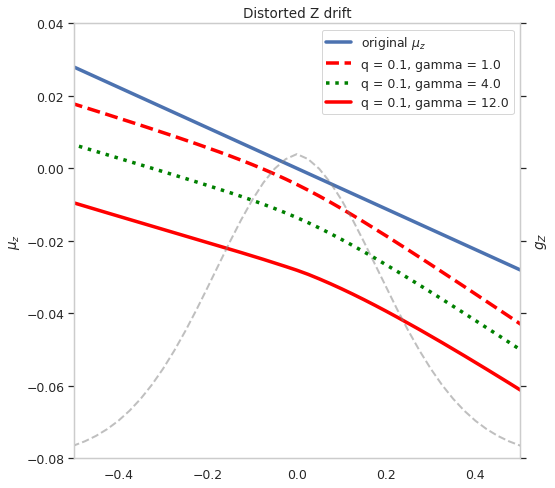

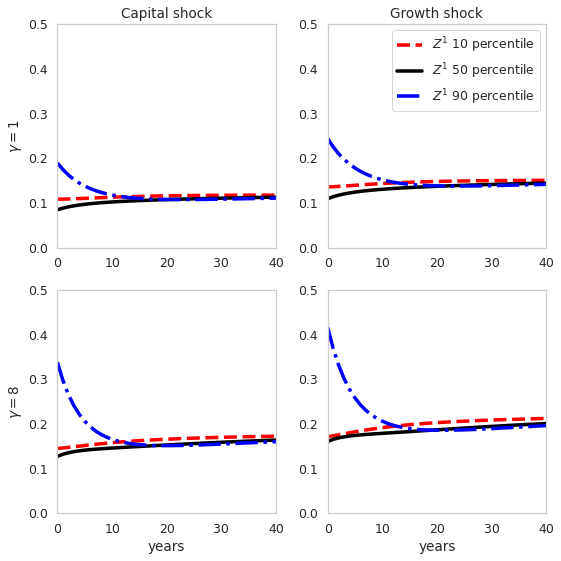

In [68]:
# dataname = "upper_triangular_four_ambiguous_parameters"
# dataname = "upper_triangular_two_ambiguous_parameters"
dataname = "lower_triangular_four_ambiguous_parameters"
# dataname = "lower_triangular_two_ambiguous_parameters"
gamma_1_q_05_rho_1 = return_fdm_solution(gamma = 1.0, q = 0.05, dataname=dataname)
gamma_1_q_10_rho_1 = return_fdm_solution(gamma = 1.0, q = 0.1, dataname=dataname)
gamma_1_q_20_rho_1 = return_fdm_solution(gamma = 1.0, q = 0.2, dataname=dataname)
gamma_1_q_30_rho_1 = return_fdm_solution(gamma = 1.0, q = 0.3, dataname=dataname)

gamma_4_q_05_rho_1 = return_fdm_solution(gamma = 4.0, q = 0.05, dataname=dataname)
gamma_4_q_10_rho_1 = return_fdm_solution(gamma = 4.0, q = 0.1, dataname=dataname)
gamma_4_q_20_rho_1 = return_fdm_solution(gamma = 4.0, q = 0.2, dataname=dataname)
gamma_4_q_30_rho_1 = return_fdm_solution(gamma = 4.0, q = 0.3, dataname=dataname)

gamma_5_q_05_rho_1 = return_fdm_solution(gamma = 5.0, q = 0.05, dataname=dataname)
gamma_5_q_10_rho_1 = return_fdm_solution(gamma = 5.0, q = 0.1, dataname=dataname)
gamma_5_q_20_rho_1 = return_fdm_solution(gamma = 5.0, q = 0.2, dataname=dataname)
gamma_5_q_30_rho_1 = return_fdm_solution(gamma = 5.0, q = 0.3, dataname=dataname)

gamma_6_q_05_rho_1 = return_fdm_solution(gamma = 6.0, q = 0.05, dataname=dataname)
gamma_6_q_10_rho_1 = return_fdm_solution(gamma = 6.0, q = 0.1, dataname=dataname)
gamma_6_q_20_rho_1 = return_fdm_solution(gamma = 6.0, q = 0.2, dataname=dataname)
gamma_6_q_30_rho_1 = return_fdm_solution(gamma = 6.0, q = 0.3, dataname=dataname)

gamma_7_q_05_rho_1 = return_fdm_solution(gamma = 7.0, q = 0.05, dataname=dataname)
gamma_7_q_10_rho_1 = return_fdm_solution(gamma = 7.0, q = 0.1, dataname=dataname)
gamma_7_q_20_rho_1 = return_fdm_solution(gamma = 7.0, q = 0.2, dataname=dataname)
gamma_7_q_30_rho_1 = return_fdm_solution(gamma = 7.0, q = 0.3, dataname=dataname)

gamma_8_q_05_rho_1 = return_fdm_solution(gamma = 8.0, q = 0.05, dataname=dataname)
gamma_8_q_10_rho_1 = return_fdm_solution(gamma = 8.0, q = 0.1, dataname=dataname)
gamma_8_q_20_rho_1 = return_fdm_solution(gamma = 8.0, q = 0.2, dataname=dataname)
gamma_8_q_30_rho_1 = return_fdm_solution(gamma = 8.0, q = 0.3, dataname=dataname)

gamma_12_q_05_rho_1 = return_fdm_solution(gamma = 12.0, q = 0.05, dataname=dataname)
gamma_12_q_10_rho_1 = return_fdm_solution(gamma = 12.0, q = 0.1, dataname=dataname)
gamma_12_q_20_rho_1 = return_fdm_solution(gamma = 12.0, q = 0.2, dataname=dataname)
gamma_12_q_30_rho_1 = return_fdm_solution(gamma = 12.0, q = 0.3, dataname=dataname)

gammas = [8.0, 12.0, 8.0, 12.0]
qs = [0.05, 0.05, 0.1, 0.1]

gammas = [8.0, 8.0, 4.0, 4.0]
gammas = [8.0, 8.0, 6.0, 6.0]
gammas = [8.0, 8.0, 12.0, 12.0]
qs = [0.05, 0.1, 0.05, 0.1]
qs = [0.1, 0.05, 0.1, 0.05]
qs = [0.2, 0.3, 0.2, 0.3]

fig, ax = plt.subplots(figsize=(8, 8))
original_z = pd.DataFrame(-npz['zz']*npz['a11'],index = npz['zz'],columns = ['original'])
sns.lineplot(data=original_z, x=original_z.index, y='original', ax=ax, label=r"original $\mu_z$")

# sns.lineplot(x = npz['zz'], y = gamma_1_q_10_rho_1['mu_z_d'], label = 'q = 0.1, gamma = 1.0', ls='--',color='orange')
sns.lineplot(x = npz['zz'], y = gamma_1_q_10_rho_1['mu_z_d'], label = 'q = 0.1, gamma = 1.0', ls='--',color='red')
sns.lineplot(x = npz['zz'], y = gamma_4_q_10_rho_1['mu_z_d'], label = 'q = 0.1, gamma = 4.0',ls=':',color='green')
sns.lineplot(x = npz['zz'], y = gamma_8_q_10_rho_1['mu_z_d'], label = 'q = 0.1, gamma = 12.0',color='red')
ax.set_ylim([-0.08, 0.04])
ax.grid(False)
ax.set_ylabel(r'$\mu_z$')
ax2 = ax.twinx()
sns.lineplot(x = npz['zz'],y=gamma_1_q_05_rho_1['g_Z'], label=r"$g_Z$", ax=ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.set_ylabel(r'$g_Z$')
ax2.set_yticklabels([])
ax2.set_ylim([0,3.0])
ax2.get_legend().remove()
ax2.grid(False)
ax.set_xlim([-0.5,0.5])
plt.title('Distorted Z drift')
plt.show()


def plot_data(ax, data, gamma, q, shock):
    sns.lineplot(data=-data['ela_dis']['NexpoElas'].secondType[0,shock,:], label=r"$Z^1$ 10 percentile", ax=ax, ls = '--', color = 'red')
    sns.lineplot(data=-data['ela_dis']['NexpoElas'].secondType[1,shock,:], label=r"$Z^1$ 50 percentile", ax=ax, ls = '-', color = 'black')
    sns.lineplot(data=-data['ela_dis']['NexpoElas'].secondType[2,shock,:], label=r"$Z^1$ 90 percentile", ax=ax, ls = '-.',  color = 'blue')
    ax.set_ylim([0.0, 2.1])
    ax.set_xlim([0.0, 40.0])
    #ax.set_ylabel(r'Price elasticity')
    #ax.set_xlabel(r'$Years$')
    if i == 0 and j==0:
        ax.set_title(r'Capital shock')
        ax.set_ylabel(r'$\gamma=1$')
    elif i == 1 and j==0:
        ax.set_title(r'Growth shock')
    if i == 0 and j==1:
        ax.set_ylabel(r'$\gamma=8$')
    if i != 1 or j!=0:
        ax.get_legend().remove()
    if j==1:
        ax.set_xlabel('years')
    ax.grid(False)
    # fig.suptitle('Uncertainty Shock Elasticities', fontsize=16)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
# datasets = [gamma_1_q_05_rho_1, gamma_8_q_05_rho_1, gamma_1_q_10_rho_1, gamma_8_q_10_rho_1]
# datasets = [gamma_1_q_10_rho_1, gamma_8_q_10_rho_1, gamma_1_q_30_rho_1, gamma_8_q_30_rho_1]
# datasets = [gamma_1_q_10_rho_1, gamma_8_q_10_rho_1, gamma_1_q_20_rho_1, gamma_8_q_20_rho_1]
# datasets = [gamma_1_q_30_rho_1, gamma_8_q_30_rho_1, gamma_1_q_40_rho_1, gamma_8_q_40_rho_1]
datasets = [gamma_1_q_20_rho_1, gamma_1_q_30_rho_1, gamma_8_q_20_rho_1, gamma_8_q_30_rho_1]
# datasets = [gamma_1_q_10_rho_1, gamma_1_q_20_rho_1, gamma_8_q_10_rho_1, gamma_8_q_20_rho_1]
# datasets = [gamma_1_q_05_rho_1, gamma_1_q_10_rho_1, gamma_8_q_05_rho_1, gamma_8_q_10_rho_1]
shocks = [0, 1]
gammas = [2.0, 4.0]
qs = [0.3, 0.3]
for i, shock in enumerate(shocks):
    for j, (data, gamma, q) in enumerate(zip(datasets, gammas, qs)):
        plot_data(axes[j, i], data, gamma, q, shock)

axes[0,0].set_ylim(0,0.5)

axes[1,0].set_ylim(0,0.5)

axes[1,1].set_ylim(0,0.5)

axes[0,1].set_ylim(0,0.5)
fig.tight_layout()
# plt.savefig('/project/lhansen/onecapqua/plot/updated_plots/nexpo.png', dpi=300, bbox_inches='tight')

plt.show()

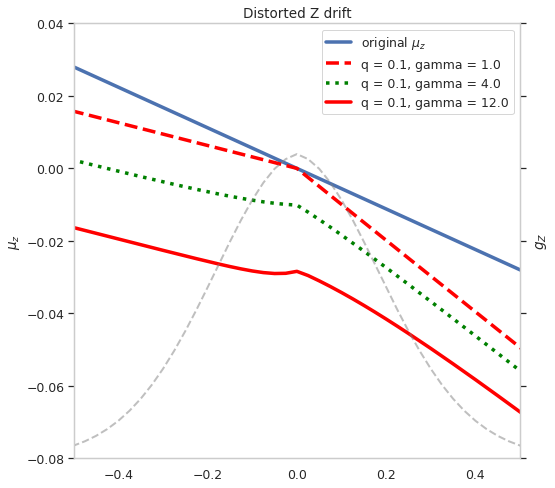

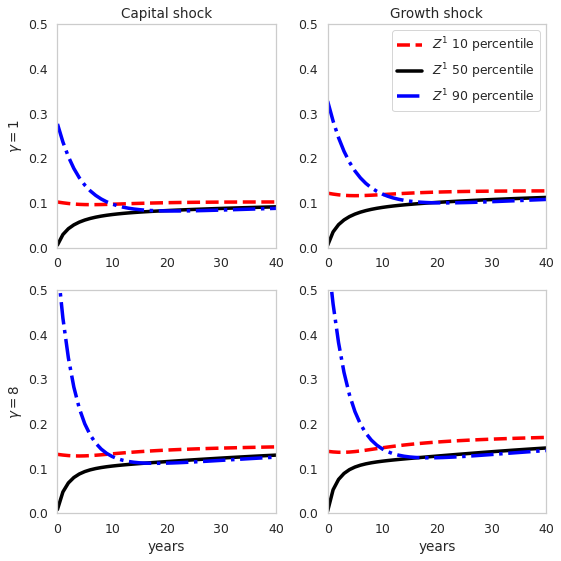

In [69]:
# dataname = "upper_triangular_four_ambiguous_parameters"
# dataname = "upper_triangular_two_ambiguous_parameters"
# dataname = "lower_triangular_four_ambiguous_parameters"
dataname = "lower_triangular_two_ambiguous_parameters"
gamma_1_q_05_rho_1 = return_fdm_solution(gamma = 1.0, q = 0.05, dataname=dataname)
gamma_1_q_10_rho_1 = return_fdm_solution(gamma = 1.0, q = 0.1, dataname=dataname)
gamma_1_q_20_rho_1 = return_fdm_solution(gamma = 1.0, q = 0.2, dataname=dataname)
gamma_1_q_30_rho_1 = return_fdm_solution(gamma = 1.0, q = 0.3, dataname=dataname)

gamma_4_q_05_rho_1 = return_fdm_solution(gamma = 4.0, q = 0.05, dataname=dataname)
gamma_4_q_10_rho_1 = return_fdm_solution(gamma = 4.0, q = 0.1, dataname=dataname)
gamma_4_q_20_rho_1 = return_fdm_solution(gamma = 4.0, q = 0.2, dataname=dataname)
gamma_4_q_30_rho_1 = return_fdm_solution(gamma = 4.0, q = 0.3, dataname=dataname)

gamma_5_q_05_rho_1 = return_fdm_solution(gamma = 5.0, q = 0.05, dataname=dataname)
gamma_5_q_10_rho_1 = return_fdm_solution(gamma = 5.0, q = 0.1, dataname=dataname)
gamma_5_q_20_rho_1 = return_fdm_solution(gamma = 5.0, q = 0.2, dataname=dataname)
gamma_5_q_30_rho_1 = return_fdm_solution(gamma = 5.0, q = 0.3, dataname=dataname)

gamma_6_q_05_rho_1 = return_fdm_solution(gamma = 6.0, q = 0.05, dataname=dataname)
gamma_6_q_10_rho_1 = return_fdm_solution(gamma = 6.0, q = 0.1, dataname=dataname)
gamma_6_q_20_rho_1 = return_fdm_solution(gamma = 6.0, q = 0.2, dataname=dataname)
gamma_6_q_30_rho_1 = return_fdm_solution(gamma = 6.0, q = 0.3, dataname=dataname)

gamma_7_q_05_rho_1 = return_fdm_solution(gamma = 7.0, q = 0.05, dataname=dataname)
gamma_7_q_10_rho_1 = return_fdm_solution(gamma = 7.0, q = 0.1, dataname=dataname)
gamma_7_q_20_rho_1 = return_fdm_solution(gamma = 7.0, q = 0.2, dataname=dataname)
gamma_7_q_30_rho_1 = return_fdm_solution(gamma = 7.0, q = 0.3, dataname=dataname)

gamma_8_q_05_rho_1 = return_fdm_solution(gamma = 8.0, q = 0.05, dataname=dataname)
gamma_8_q_10_rho_1 = return_fdm_solution(gamma = 8.0, q = 0.1, dataname=dataname)
gamma_8_q_20_rho_1 = return_fdm_solution(gamma = 8.0, q = 0.2, dataname=dataname)
gamma_8_q_30_rho_1 = return_fdm_solution(gamma = 8.0, q = 0.3, dataname=dataname)

gamma_12_q_05_rho_1 = return_fdm_solution(gamma = 12.0, q = 0.05, dataname=dataname)
gamma_12_q_10_rho_1 = return_fdm_solution(gamma = 12.0, q = 0.1, dataname=dataname)
gamma_12_q_20_rho_1 = return_fdm_solution(gamma = 12.0, q = 0.2, dataname=dataname)
gamma_12_q_30_rho_1 = return_fdm_solution(gamma = 12.0, q = 0.3, dataname=dataname)

gammas = [8.0, 12.0, 8.0, 12.0]
qs = [0.05, 0.05, 0.1, 0.1]

gammas = [8.0, 8.0, 4.0, 4.0]
gammas = [8.0, 8.0, 6.0, 6.0]
gammas = [8.0, 8.0, 12.0, 12.0]
qs = [0.05, 0.1, 0.05, 0.1]
qs = [0.1, 0.05, 0.1, 0.05]
qs = [0.2, 0.3, 0.2, 0.3]


fig, ax = plt.subplots(figsize=(8, 8))
original_z = pd.DataFrame(-npz['zz']*npz['a11'],index = npz['zz'],columns = ['original'])
sns.lineplot(data=original_z, x=original_z.index, y='original', ax=ax, label=r"original $\mu_z$")

# sns.lineplot(x = npz['zz'], y = gamma_1_q_10_rho_1['mu_z_d'], label = 'q = 0.1, gamma = 1.0', ls='--',color='orange')
sns.lineplot(x = npz['zz'], y = gamma_1_q_10_rho_1['mu_z_d'], label = 'q = 0.1, gamma = 1.0', ls='--',color='red')
sns.lineplot(x = npz['zz'], y = gamma_4_q_10_rho_1['mu_z_d'], label = 'q = 0.1, gamma = 4.0',ls=':',color='green')
sns.lineplot(x = npz['zz'], y = gamma_8_q_10_rho_1['mu_z_d'], label = 'q = 0.1, gamma = 12.0',color='red')
ax.set_ylim([-0.08, 0.04])
ax.grid(False)
ax.set_ylabel(r'$\mu_z$')
ax2 = ax.twinx()
sns.lineplot(x = npz['zz'],y=gamma_1_q_05_rho_1['g_Z'], label=r"$g_Z$", ax=ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.set_ylabel(r'$g_Z$')
ax2.set_yticklabels([])
ax2.set_ylim([0,3.0])
ax2.get_legend().remove()
ax2.grid(False)
ax.set_xlim([-0.5,0.5])
plt.title('Distorted Z drift')
plt.show()


def plot_data(ax, data, gamma, q, shock):
    sns.lineplot(data=-data['ela_dis']['NexpoElas'].secondType[0,shock,:], label=r"$Z^1$ 10 percentile", ax=ax, ls = '--', color = 'red')
    sns.lineplot(data=-data['ela_dis']['NexpoElas'].secondType[1,shock,:], label=r"$Z^1$ 50 percentile", ax=ax, ls = '-', color = 'black')
    sns.lineplot(data=-data['ela_dis']['NexpoElas'].secondType[2,shock,:], label=r"$Z^1$ 90 percentile", ax=ax, ls = '-.',  color = 'blue')
    ax.set_ylim([0.0, 2.1])
    ax.set_xlim([0.0, 40.0])
    #ax.set_ylabel(r'Price elasticity')
    #ax.set_xlabel(r'$Years$')
    if i == 0 and j==0:
        ax.set_title(r'Capital shock')
        ax.set_ylabel(r'$\gamma=1$')
    elif i == 1 and j==0:
        ax.set_title(r'Growth shock')
    if i == 0 and j==1:
        ax.set_ylabel(r'$\gamma=8$')
    if i != 1 or j!=0:
        ax.get_legend().remove()
    if j==1:
        ax.set_xlabel('years')
    ax.grid(False)
    # fig.suptitle('Uncertainty Shock Elasticities', fontsize=16)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
# datasets = [gamma_1_q_05_rho_1, gamma_8_q_05_rho_1, gamma_1_q_10_rho_1, gamma_8_q_10_rho_1]
# datasets = [gamma_1_q_10_rho_1, gamma_8_q_10_rho_1, gamma_1_q_30_rho_1, gamma_8_q_30_rho_1]
# datasets = [gamma_1_q_10_rho_1, gamma_8_q_10_rho_1, gamma_1_q_20_rho_1, gamma_8_q_20_rho_1]
# datasets = [gamma_1_q_30_rho_1, gamma_8_q_30_rho_1, gamma_1_q_40_rho_1, gamma_8_q_40_rho_1]
datasets = [gamma_1_q_20_rho_1, gamma_1_q_30_rho_1, gamma_8_q_20_rho_1, gamma_8_q_30_rho_1]
# datasets = [gamma_1_q_10_rho_1, gamma_1_q_20_rho_1, gamma_8_q_10_rho_1, gamma_8_q_20_rho_1]
# datasets = [gamma_1_q_05_rho_1, gamma_1_q_10_rho_1, gamma_8_q_05_rho_1, gamma_8_q_10_rho_1]
shocks = [0, 1]
gammas = [2.0, 4.0]
qs = [0.3, 0.3]
for i, shock in enumerate(shocks):
    for j, (data, gamma, q) in enumerate(zip(datasets, gammas, qs)):
        plot_data(axes[j, i], data, gamma, q, shock)

axes[0,0].set_ylim(0,0.5)

axes[1,0].set_ylim(0,0.5)

axes[1,1].set_ylim(0,0.5)

axes[0,1].set_ylim(0,0.5)
fig.tight_layout()
# plt.savefig('/project/lhansen/onecapqua/plot/updated_plots/nexpo.png', dpi=300, bbox_inches='tight')

plt.show()
